# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [292]:
# Import the appropriate libraries
#importing the pandas library and various others in order to use it for my dataframes for this assignment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
#added these details for visualization section later in this assignment
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

# Create two new dataframes
#north_df indicates the datafram for the North Call Center. I have done a read_csv in order to import the dataframe here
north_df = pd.read_csv("NorthCallCenter.csv")
#south_df indicates the datafram for the North Call Center. I have done a read_csv in order to import the dataframe here
south_df = pd.read_csv("SouthCallCenter.csv")
# north_df.head() - ran this to make sure that the csv file was read
# south_df.head() - ran this to make sure that the csv file was read
north_df.columns 
#ran columns to see what categories I am looking at when analyzing the data. Both North and South have the same columns.

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

************ANSWERED AT THE END OF THE EDA SECTION***************
1. How many reps are in each branch? 
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch? 
3. What is the number of calls taken for each time block?

In [124]:
# Put your EDA code here
#Calling info for North Call Center dataframe to see a big picture of the data
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [125]:
north_df["Rep ID"].describe()
# north_df["Rep ID"].value_counts()
#This code for describing the column "Rep ID" in the dataframe shows me that there are 9 reps total in the North Call Center

count       245
unique        9
top       Brent
freq         37
Name: Rep ID, dtype: object

In [126]:
south_df["Rep ID"].describe()
#This code for describing the column "Rep ID" in the dataframe shows me that there are 11 reps total in the South Call Center

count      314
unique      11
top       Eric
freq        35
Name: Rep ID, dtype: object

In [127]:
# Coding to determine the average busy minutes, not ready minutes, incoming wait time, and during call wait time for North branch.
# used .mean() to determine the average for each column listed below
north_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

In [128]:
# Coding to determine the average busy minutes, not ready minutes, incoming wait time, and during call wait time for South branch.
# used .mean() to determine the average for each column listed below
south_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

In [129]:
#Ran value_counts() for the Time Block and Calls columns for North branch. This set the two columns in a table to show how 
#many calls came in per time block.
north_df[["Time Block", "Calls"]].value_counts()

Time Block  Calls
12:00 PM    1        45
10:00 AM    1        43
2:00 PM     1        35
3:00 PM     1        30
4:00 PM     1        28
11:00 AM    1        25
1:00 PM     1        17
5:00 PM     1        17
9:00 AM     1         5
dtype: int64

In [646]:
#Ran value_counts() for the Time Block and Calls columns for South branch. This set the two columns in a table to show how 
#many calls came in per time block.
south_df[["Time Block", "Calls"]].value_counts()

Time Block  Calls
12:00 PM    1        75
10:00 AM    1        56
3:00 PM     1        43
11:00 AM    1        31
2:00 PM     1        30
5:00 PM     1        26
4:00 PM     1        25
1:00 PM     1        23
9:00 AM     1         5
dtype: int64

### EDA Results

Make note of your results here!

1. How many reps are in each branch?
    - There are 9 reps in the North Call Center and 11 reps in the South Call Center.
    

2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch? 
    - North Branch
        Busy Minutes             9.987755
        Not Ready Minutes        1.914286
        Incoming Wait Time       3.048780
        During Call Wait Time    2.967347
        
    - South Branch
        Busy Minutes             10.054140
        Not Ready Minutes         1.910828
        Incoming Wait Time        3.000000
        During Call Wait Time     3.076433
        
        
3. What is the number of calls taken for each time block?
        -North Branch:
            Time Block  Calls
            12:00 PM    1        45
            10:00 AM    1        43
            2:00 PM     1        35
            3:00 PM     1        30
            4:00 PM     1        28
            11:00 AM    1        25
            1:00 PM     1        17
            5:00 PM     1        17
            9:00 AM     1         5

        - South Branch
            Time Block  Calls
            12:00 PM    1        75
            10:00 AM    1        56
            3:00 PM     1        43
            11:00 AM    1        31
            2:00 PM     1        30
            5:00 PM     1        26
            4:00 PM     1        25
            1:00 PM     1        23
            9:00 AM     1         5

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

************ANSWERED AT THE END OF THE CLEANING DATA SECTION*****************


1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [131]:
# Clean your data here
#North Dataframe cleaning
#check North dataframe to get an overview
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [132]:
#check North dataframe to get an overview

north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [133]:
#checking for any columns that may have percentages of null values - results for this one are teh Incoming Wait Time column
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


In [134]:
#checking the end of the North dataframe to get an overview
north_df.tail()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1
244,244,North,Product Support,5:00 PM,Outgoing,B,Xander,NO,0,0,8,1,NaN,4,1


In [135]:
north_df[['Incoming or Outgoing', 'Incoming Wait Time']].apply(pd.Series.value_counts)
#Question 1 for North
#This table confirms that all of the null values are for outgoing calls. Given that the wait time 1.0, 2.0, 3.0, 4.0, 5.0 adds
#up to 82, which is the amount of Incoming calls. Therefore every outgoing call has a corresponding null value in 
#Incoming Wait time.

,Incoming or Outgoing,Incoming Wait Time
1.0,NaN,17.0
2.0,NaN,16.0
3.0,NaN,12.0
4.0,NaN,20.0
5.0,NaN,17.0
Incoming,82.0,NaN
Outgoing,163.0,NaN


In [136]:
#Question 2 mentiosn that there are more than one YES values in the North dataframe. Conducting a value_counts to check that
north_df[['Sale']].value_counts()

Sale
NO      234
YES      10
YES       1
dtype: int64

In [137]:
north_df.loc[north_df['Sale'] == 'YES ']
#Located the extra value of YES that had a space after it. 

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
19,19,North,Sales Support,10:00 AM,Incoming,B,Lilly,YES,0,0,11,2,2.0,4,1


In [138]:
#Changing the extra value of "YES " with the other "YES" so not all yes values are the same and there is a total of 11
north_df.at[19, "Sale"] = 'YES'
north_df[['Sale']].value_counts()

Sale
NO      234
YES      11
dtype: int64

In [52]:
#Question 3 for North Dataframe
#running general duplicated code to see overall picture
north_df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
240    False
241    False
242    False
243    False
244    False
Length: 245, dtype: bool

In [53]:
#needed to look closer, checking sum to determine that there are 2 rows that are duplicated
north_df.duplicated().sum()

2

In [652]:
north_df.loc[north_df.duplicated(), :]
#located the two rows that have duplicates

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
50,North,Sales Support,12:00 PM,Incoming,A,Joe,NO,0,0,10,1,4.0,3,1
105,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,11,2,NaN,2,1


In [653]:
north_df.loc[north_df.duplicated(keep=False), :]
#I was going to remove row 50 as it appears that this truly is an accidental duplicate given that the rows are one after the other
#Decided to keep the duplicates at least for now given that there aren't many and it doesn't appear that they would majorly skew the data

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
49,North,Sales Support,12:00 PM,Incoming,A,Joe,NO,0,0,10,1,4.0,3,1
50,North,Sales Support,12:00 PM,Incoming,A,Joe,NO,0,0,10,1,4.0,3,1
94,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,11,2,NaN,2,1
105,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,11,2,NaN,2,1


In [648]:
#Question 4 (North)- Unnecessary data in data set - Checking Calls column. Is it just counting each call as 1? 
#Are there any values besides 1 in the Calls column?
north_df[['Calls']].value_counts()
#The only value in the Calls column is 1. There were never more than 1 call for each row. I will be removing this column.
######NOTE - I did end up removing Calls column only to need it later. I put calls back into the table so that I could use it later###
#In addition to this column, the "Unnamed" column is the same as the index column and therefore is not neccessary. 
#I will remove the Unnamed column in the next cell


Calls
1        245
dtype: int64

In [650]:
#North Data Frame - removing unneccessary data
north_df.drop(['Unnamed: 0'], inplace = True, axis = 1)


In [651]:
north_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [142]:
#South Dataframe Cleaning
#checking South dataframe to get a picture of the data
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [143]:
#checked info to get a better picture of the data
south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

In [144]:
#ran percentages for null values to see that just like the North Branch, the South Branch has a significant amount of null values
#in the Incoming Wait Time column
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


In [145]:
#checking the end of the South dataframe to get a better picture of the data
south_df.tail()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1
313,313,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,NaN,3,1


In [146]:
south_df[['Incoming or Outgoing', 'Incoming Wait Time']].apply(pd.Series.value_counts)
#Question 1 for South
#This table confirms that all of the null values are for outgoing calls. Given that the wait time 1.0, 2.0, 3.0, 4.0, 5.0 adds
#up to 126, which is the amount of Incoming calls. Therefore every outgoing call has a corresponding null value in 
#Incoming Wait time.

,Incoming or Outgoing,Incoming Wait Time
1.0,NaN,20.0
2.0,NaN,28.0
3.0,NaN,29.0
4.0,NaN,30.0
5.0,NaN,19.0
Incoming,126.0,NaN
Outgoing,188.0,NaN


In [50]:
#Question 3 for South Dataframe
#checking for duplicates in general
south_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
309    False
310    False
311    False
312    False
313    False
Length: 314, dtype: bool

In [51]:
#Use sum to see specifically if there actually were any duplicates and if so how many - there in fact are 3 in the dataframe
south_df.duplicated().sum()

3

In [657]:
south_df.loc[south_df.duplicated(), :]
#located rows that have duplicates

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
58,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
170,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,NaN,2,1
180,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,NaN,4,1


In [659]:
south_df.loc[south_df.duplicated(keep=False), :]
#considered removed row 58 but decided to keep it. Since the duplicate is right before it, there is a high possibility that this 
#one was accidentally typed twice. For now, I am going to keep it as I don't anticipate it majorly skewing the data

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
57,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
58,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
166,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,NaN,2,1
170,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,NaN,2,1
175,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,NaN,4,1
180,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,NaN,4,1


In [33]:
#ran value_counts on South Branch reps just to see how many Calls each rep made. I wanted to do this to analyze the duplicates
#a bit more to see if there was anything I was missing or if there was a major need for me to remove any of them.
south_df[["Rep ID"]].value_counts()

Rep ID
Eric      35
Randy     33
Sandy     32
Helga     31
George    29
Kate      29
Karl      28
Josh      26
Susan     26
Sharon    25
Alice     20
dtype: int64

In [34]:
#Continued to deeper analysis of duplicates - specifically with one rep - Kate
#determined that the duplicates could possibly not be mistakes so I decided to go ahead and keep them.
south_df.loc[south_df['Rep ID'] == 'Kate']


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
23,23,South,Sales Support,11:00 AM,Incoming,D,Kate,NO,0,0,12,3,2.0,3,1
38,38,South,Complaint,12:00 PM,Incoming,D,Kate,NO,0,0,10,1,2.0,2,1
52,52,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,11,3,3.0,2,1
57,57,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
58,58,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
89,89,South,Product Support,11:00 AM,Incoming,D,Kate,NO,0,0,9,1,4.0,3,1
105,105,South,Complaint,2:00 PM,Incoming,D,Kate,NO,0,0,9,3,4.0,3,1
112,112,South,Product Support,2:00 PM,Incoming,D,Kate,NO,0,0,8,2,5.0,3,1
119,119,South,Complaint,10:00 AM,Incoming,D,Kate,NO,0,0,12,3,5.0,3,1


In [655]:
#Question 4 (South)- Unnecessary data in data set - Checking Calls column. Is it just counting each call as 1? 
#Are there any values besides 1 in the Calls column?
south_df[['Calls']].value_counts()
#The only value in the Calls column is 1. There were never more than 1 call for each row. I will be removing this column.
###NOTE - I initially removed the Calls column but came to needing the column later in this assignment so I came back to re-add it
#In addition to this column, the "Unnamed" column is the same as the index column and therefore is not neccessary. 
#I will remove the Unnamed column in the next cell


Calls
1        314
dtype: int64

In [656]:
#Removed Unnamed column
south_df.drop(['Unnamed: 0'], inplace = True, axis = 1)
south_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls? 
    - Yes, all of the calls for both dataframes do correspond to outgoing calls.
    
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue? 
    - The second "YES " had a space afterward. I fixed this by locating that particular value of "YES " and replacing it with the space removed. 
    
3. Are there duplicates in the two data sets? If there are, how did you handle them? 
    - Yes there are duplicates. It is hard to determine what to do with these as they aren't majorly skewing data and there are not that many of them. I have gone back and forth as to whether I keep some and elminate others. The only ones I was considering eliminating were for the caller Joe in the North data and caller Kate in the South data as their particular duplicate points were indexed one after the other. I decided to leave them for now. I may come back and remove them but for now they are not skewing the data in a major way.
    
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it? 
    - I did determine that  the "Unnamed: 0" column which just basically repeats the index was unnecessary so I removed that column for both the North and South dataframes.

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

#####ANSWERED THESE QUESTIONS AT THE END OF THE DATA MANIPULATION SECTION########

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [229]:
# Manipulate data here
#I attempted to join the dataframes at "Time Block" but determined that concat would work better for the particular way I wanted
#to view and manipulate the data.
# df=south_df.join(north_df.set_index(['Time Block']), on = ['Time Block'], lsuffix = '_south', rsuffix = '_north')
# df.set_index('Time Block').head()
df = pd.concat([north_df, south_df], ignore_index=True)
df.tail()


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
554,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1
558,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,NaN,3,1


In [175]:
#Question 1 - Group by Rep ID
df_group = df.groupby(['Rep ID', 'Branch'])
df_group.agg('sum').sort_values('Calls', ascending=False)
#Brent from the North branch is the top caller
#Eric from the South branch is the top caller

,,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,Branch,,,,,,,
Brent,North,0,1,362,71,17.0,117,37
Eric,South,0,0,361,54,47.0,112,35
Randy,South,3,1,320,66,47.0,98,33
Sandy,South,1,0,325,60,34.0,100,32
Helga,South,0,2,292,58,36.0,95,31
Lilly,North,0,2,307,59,37.0,88,30
Todd,North,1,0,296,58,21.0,97,29
Duke,North,2,0,292,56,39.0,85,29
George,South,0,0,298,53,41.0,87,29


In [200]:
#Question 2
#I started with another groupby but wanted to isolate the Branch and average abandoned calls from the rest of the data. 
#Created a pivot_table to analyze these two points specifically
# df_group_2 = df.groupby('Branch')['Abandoned'].mean()*100
# df_group_2
df.pivot_table(values = 'Abandoned', index = ['Branch'], aggfunc=np.mean)

,Abandoned
Branch,
North,0.028571
South,0.012739


In [191]:
#Average percentage of Abandoned calls for both branches
df[['Abandoned']].mean()*100

Abandoned    1.9678
dtype: float64

In [660]:
#Question 3
#Created another pivot_table to view and analyze the average "Incoming Wait Time" for each branch
df.pivot_table(values = 'Incoming Wait Time', index = ['Branch'], aggfunc=np.mean)

,Incoming Wait Time
Branch,
North,3.04878
South,3.00000


In [269]:
#set up a function to where I could determine the value_counts for the 'Incoming Wait Time' that was equal to or less than 2, 
#as that is what Question 3 is looking for
def wait_time(series):
    if series <= 2:
        return series
    else:
        return 0
df['Incoming Wait Time Good'] = df['Incoming Wait Time'].apply(wait_time)
df[['Incoming Wait Time']].value_counts(sort=False)

Incoming Wait Time
1.0                   37
2.0                   44
3.0                   41
4.0                   50
5.0                   36
dtype: int64

In [270]:
df['Incoming Wait Time'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
554    NaN
555    NaN
556    NaN
557    NaN
558    NaN
Name: Incoming Wait Time, Length: 559, dtype: float64>

In [272]:
#created a pivot_table to determine the value counts from 1 and 2 seconds for call wait time (which I am called the Good wait time)
#0.0 stands for all other numbers. Unfortunately, the numbers add up to more rows of data than we have
#I attempted fixing it several times. I am not sure why this is happening.
df.pivot_table(values='Incoming Wait Time', index  = ['Branch' , 'Incoming Wait Time Good'], aggfunc=np.sum)

Incoming Wait Time
Branch Incoming Wait Time Good                    
North  0.0                                   201.0
       1.0                                    17.0
       2.0                                    32.0
South  0.0                                   302.0
       1.0                                    20.0
       2.0                                    56.0

In [256]:
#Found the average percent of good wait_time for both North and South combined.
wait_time_good_sum = df['Incoming Wait Time Good'].agg(sum)
wait_time_sum = df['Incoming Wait Time'].agg(sum)
wait_time_good_sum/wait_time_sum*100

19.904458598726116

In [274]:
df['Incoming Wait Time'].agg('mean')
#this is the average Incoming Wait Time for both North and South combined

3.019230769230769

In [276]:
df.pivot_table(values='Incoming Wait Time', index = ['Branch'], aggfunc=np.mean)
#created a pivot_table to determine the average Incoming Wait time for each branch

,Incoming Wait Time
Branch,
North,3.04878
South,3.00000


### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls. 
    - North rep with highest number of calls - Brent
    - South rep with highest number of calls - Eric

2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
    - North average call abandonment rate - about 2.86% (2.857143)
    - South average call abandonment rate - about 1.27% (1.273885)
    - Average call abandonment rate about 1.97% (1.9678)
    - The South and the overall average do fall out of the optimal range. The north average is in the optimal range. 
    
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
    - 19.90% of calls were answer within 2 seconds for the whole company
    - North - 19.6%
    - South - 20.11%
    
4. For each branch and the entire company, what is the average speed of answer?
    - Entire Company - 3.019230769230769 seconds
    - North Branch - 3.04878
    - South Branch - 3.0

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

#####EACH VISUALIZATION PRESENTED SHOWS THE ANSWER TO THE QUESTIONS STATED BELOW####

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

{'A': 0.041666666666666664, 'B': 0.020134228187919462, 'C': 0.007246376811594203, 'D': 0.017045454545454544}


<BarContainer object of 4 artists>

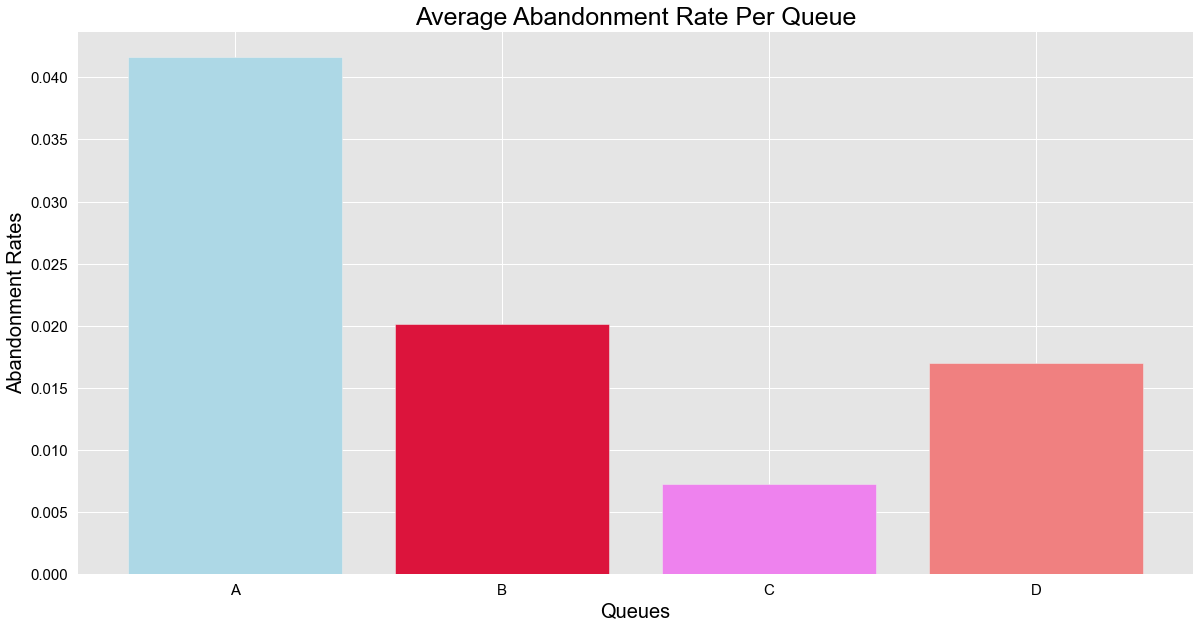

In [462]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.
#Created a simple bar chart to show Average Abandonment rate per queue
style.use('ggplot')

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    values = abandonment_rates[queues[i]]
print(abandonment_rates)
#separated the dictionary into keys and values in order to create the bar chart
keys = abandonment_rates.keys()
values = abandonment_rates.values()
style.use('ggplot')
#organization and specifics for the bar chart below
plt.title('Average Abandonment Rate Per Queue',color = 'black', size = 25)
plt.xticks(color = 'black', size = 15)
plt.yticks(color = 'black', size = 15)
plt.xlabel('Queues',color = 'black', size = 20)
plt.ylabel('Abandonment Rates',color = 'black', size=20)
# plt.legend(title = 'Queues', fontsize = 15, labelcolor='red')
plt.bar(keys,values, color=('lightblue', "crimson", "violet", "lightcoral"))



#Question 1 Visualization below

In [471]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#ran the service_level.head() to see what the data looked like
service_level.head()

,Calls_x,Calls_y,Service Level %
Rep ID,,,
Amanda,3,5,60.000000
Andy,3,10,30.000000
Brent,6,8,75.000000
Cam,5,11,45.454545
Duke,6,14,42.857143


In [498]:
#set a new variable for dataframe to show a table of merged north_plt and service_level in order to be able to complete my final
#visualization for this dataset
top_reps = pd.merge(north_plt, service_level, on = 'Rep ID')
top_reps.head(10)

,Rep ID,Incoming Wait Time,Calls_x,Calls_y,Service Level %
0,Amanda,2.400000,3,5,60.000000
1,Andy,3.600000,3,10,30.000000
2,Brent,2.125000,6,8,75.000000
3,Cam,2.909091,5,11,45.454545
4,Duke,2.785714,6,14,42.857143
5,Joe,3.600000,2,10,20.000000
6,Lilly,3.083333,4,12,33.333333
7,Todd,3.500000,2,6,33.333333
8,Xander,3.333333,2,6,33.333333


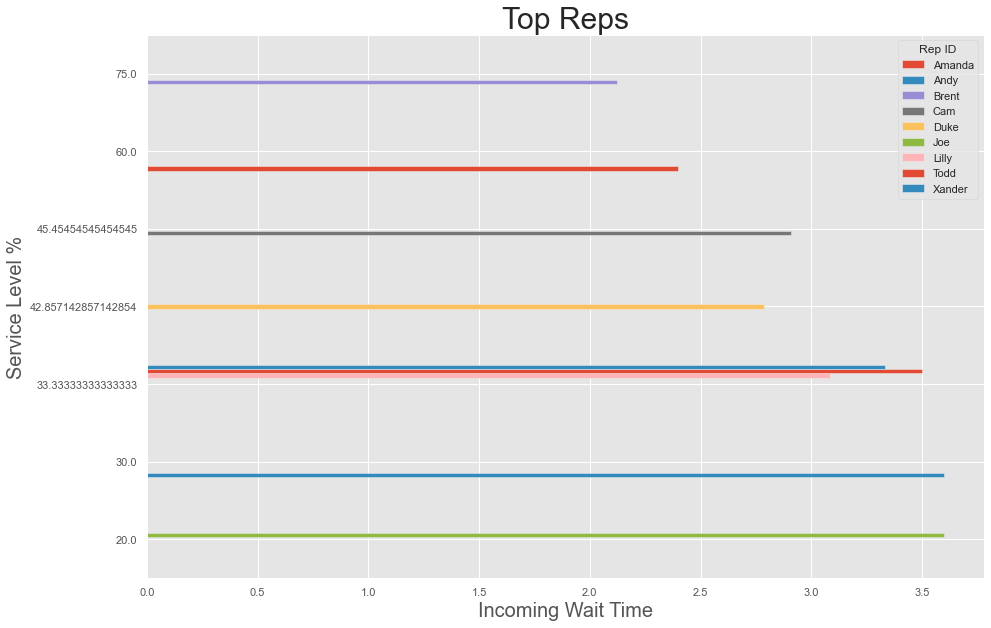

In [537]:
#decided on a horizontal bar chart. This shows each of the values for the Service Level % on the left with its corresponding bar
#for each representative
#the Incoming Wait time is on the x axis
style.use('ggplot')

top_reps_pivot = pd.pivot_table(top_reps, values="Incoming Wait Time", index="Service Level %", columns="Rep ID")
ax = top_reps_pivot.plot(kind="barh")

plt.title('Top Reps', size = 30)
plt.xlabel('Incoming Wait Time', size = 20)
plt.ylabel('Service Level %', size = 20) 
plt.rcParams["figure.figsize"] = (15, 10)
plt.show()

In [605]:
# Create visualization 3 here
### I continued to get errors when trying to work with the coded dictionaries set here. Purpose_group was not defined so I 
#decided to create my own table with the values needed for this particular question. I then used the table I created to 
#create my visualization. Therefore, the code that was here before I started is commented out as it would not allow me to evaluate
# it and I used my table for the visualization for this particular one.
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
purpose_counts = df.groupby(['Incoming or Outgoing', 'Call Purpose'])[['Calls']].agg(sum)
# purpose_group = df.groupby(['Call Purpose','Incoming or Outgoing'])['Calls'].count()
purpose_counts
# purpose_counts = df["Incoming or Outgoing"].value_counts()
# purpose_counts.head()
# complaints = purpose_group["Complaint"].to_dict()
# sales_support = purpose_counts["Sales Support"].to_dict()
# product_support = purpose_counts["Product Support"].to_dict()


Calls
Incoming or Outgoing Call Purpose          
Incoming             Complaint           51
                     Product Support     82
                     Sales Support       75
Outgoing             Product Support    228
                     Sales Support      123

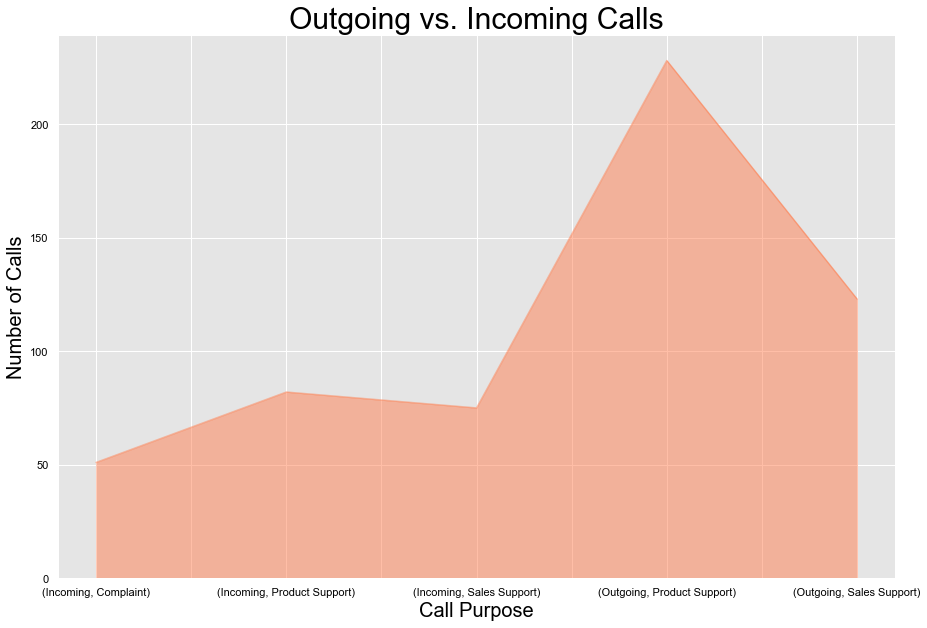

In [645]:
#choosing a simple area graph to show the call purpose clearly and whether it is ingoing or outgoing. The area table allows me to
#compare more clearly as well (rather than a simple line plot).
import seaborn as sb
color = ['coral','lightcoral', 'violet', 'yellow', 'crimson']
purpose_counts.plot(kind = 'area', stacked = False, color = color, legend=False)
plt.title('Outgoing vs. Incoming Calls',color = 'black', size = 30)
plt.xlabel('Call Purpose',color = 'black', size=20)
plt.ylabel('Number of Calls',color = 'black', size=20)
plt.xticks(color = 'black')
plt.yticks(color = 'black')
# plt.savefig('area_unstacked.png')

plt.show()

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

    - Visualization 1 - I created a very simple bar chart for this visualization as we were using dictionaries to plot the points and it was 4 queues that we were looking at. The bar chart shows specifically those 4 queues and gives me of the average abandonment rate per queue.

    - Visualization 2 - I chose a horizontal bar chart. I had difficulty with getting the bars to align directly to the numbers they correspond with, but this was a good way to see each Rep's values and to compare them to each other to determine the top rep. I preferred horizontal on this one as I found it the clearest way to compare values and to see how close reps were to each other.

    - Visualization 3 - I chose a simple area chart as it displayed the Incoming and Outgoing Call purposes clearly on the x axis. Also, the shape of the plot helps me see exactly where the calls fall and be able to evaluate further. 

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
    - Overall, the South Branch appears to be working slightly more efficiently than the North branch. The South branch has an abandonment rate of 1.59% less than the North branch. So there is a fairly large difference there. Their service level is slightly better as they are answer .51% more calls in 2 seconds or less than the North branch. And finally, their average speed of answer is exactly 3.0 seconds which is slightly better than the north by .04 seconds.
    
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
    - The North branch could definitely benefit from 2 additional reps, just like the South branch has, given that they are just slightly less efficient than the South branch. It might not only be the amount of reps but this is a good start to assessing efficiency given the statistics we analyzed.
    
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?
    - I would like to know how long the shifts are for the reps. The Time Blocks show the calls but not the shifts. Also, given that it is a call center, it would be helpful information to analyze how many calls had to escelate to a manager. 

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
